In [1]:
from python import FileManager
from python import Clusterer
%load_ext autoreload
%autoreload 2

# Wikir

In [2]:
dataset = FileManager.csv_to_dict("wikir/RRM2L.csv")
dataset_keys = list(dataset.keys())

369721it [02:02, 3027.14it/s]


In [3]:
from gensim.models import Word2Vec
tokenized_documents = dataset.values()

In [4]:
model = Word2Vec.load("models/embedding_6_epoch_20.model")

In [5]:
import numpy as np
from tqdm import tqdm

documents_vectors = []
for doc in tqdm(tokenized_documents):
    # Filter out tokens not in the model's vocabulary
    valid_tokens = [token for token in doc if token in model.wv]
    # Calculate the average vector for each document
    if valid_tokens:  # Check if there are any valid tokens
        doc_vector = np.mean([model.wv[token] for token in valid_tokens], axis=0)
        documents_vectors.append(doc_vector)
    else:
        # Handle documents with no valid tokens (e.g., empty documents)
        documents_vectors.append(np.zeros(model.vector_size))

# Convert to a 2D array
documents_vectors = np.array(documents_vectors)

100%|██████████| 369721/369721 [01:16<00:00, 4852.17it/s]


In [ ]:
# vectorizer, dataset_keys, tfidf_matrix, corpus_matrix = FileManager.load_model_from_drive("python/model/wikir")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


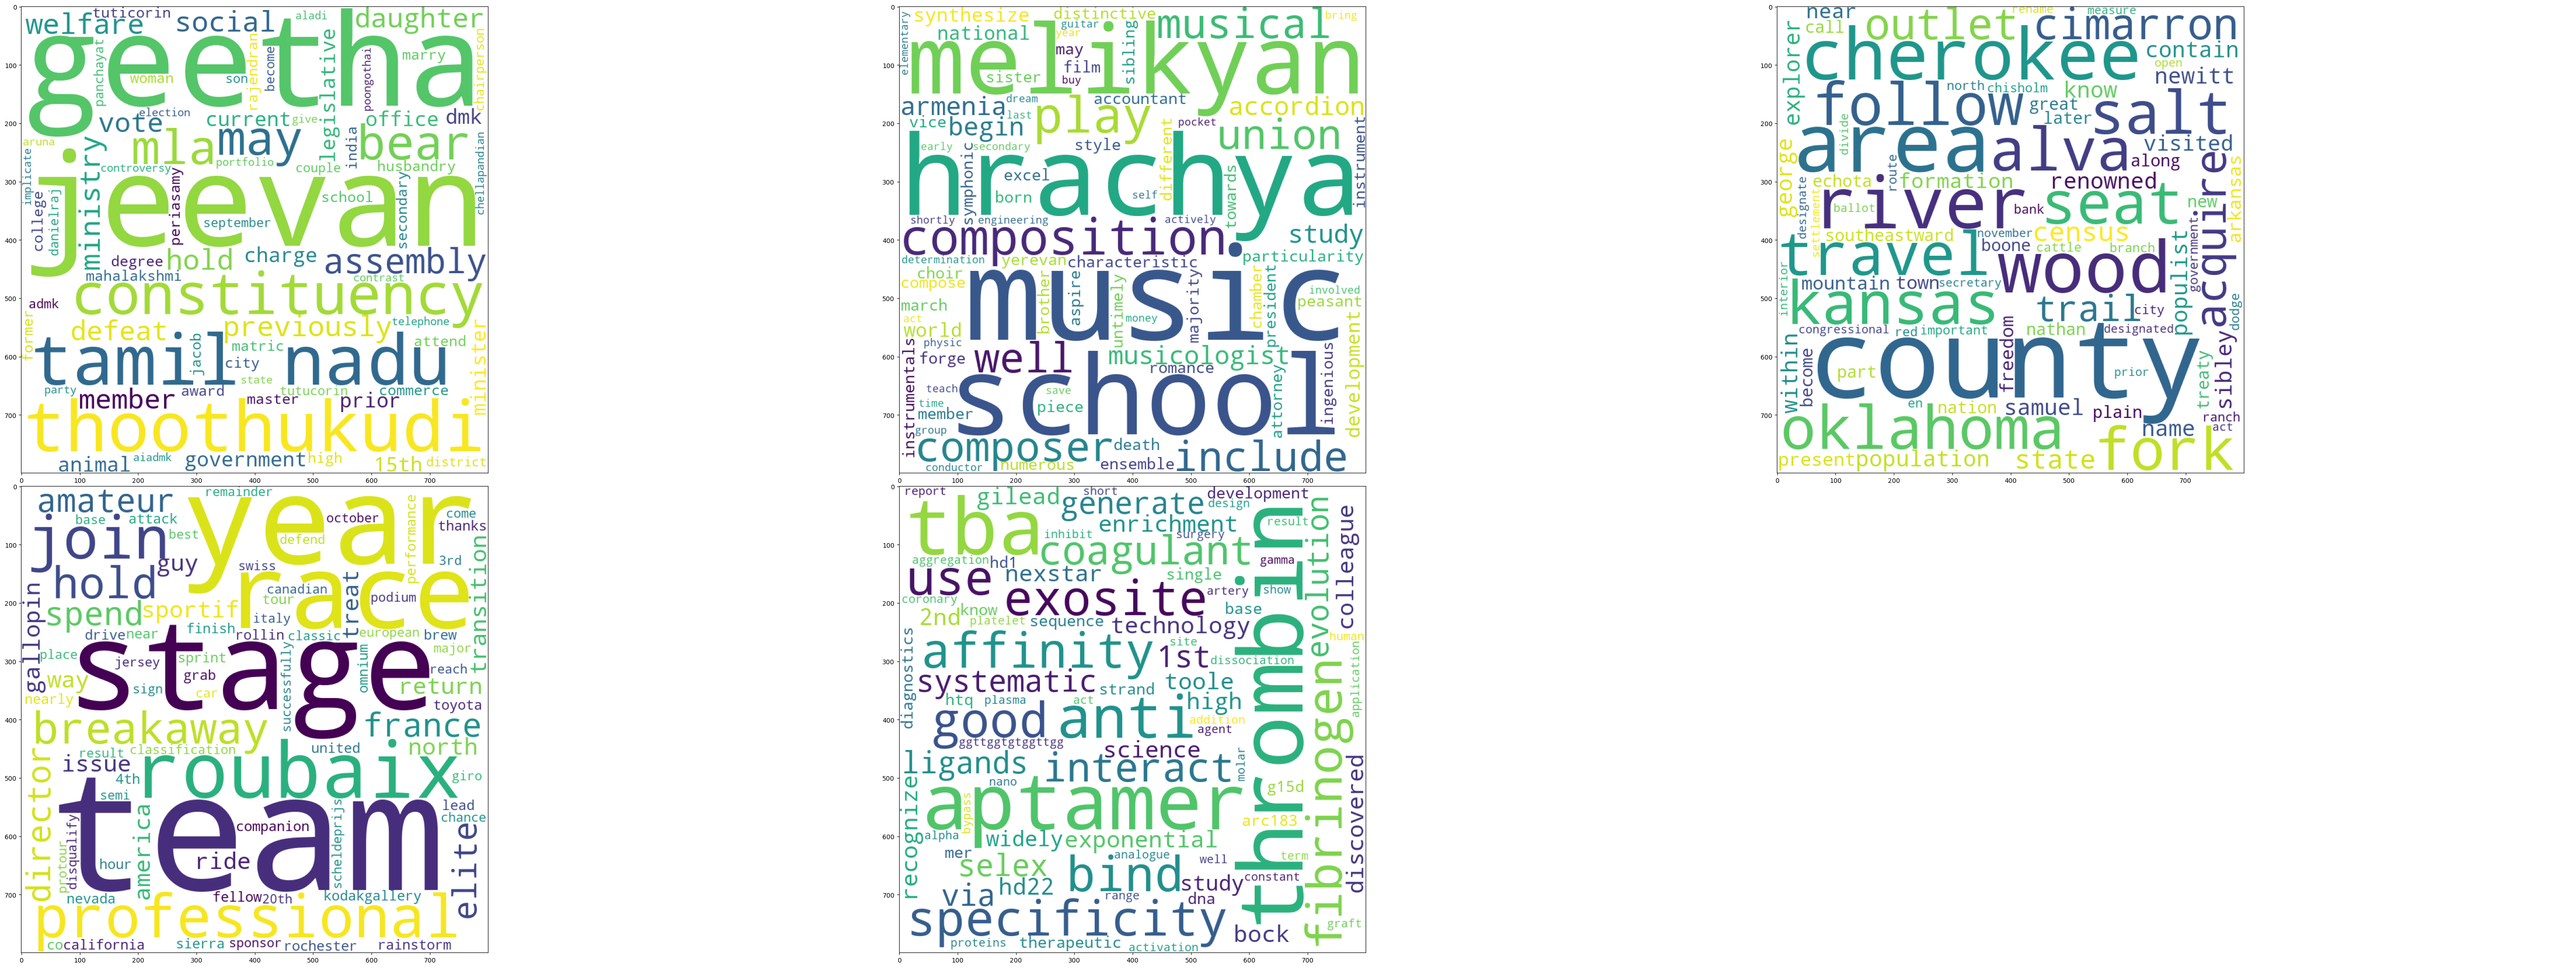

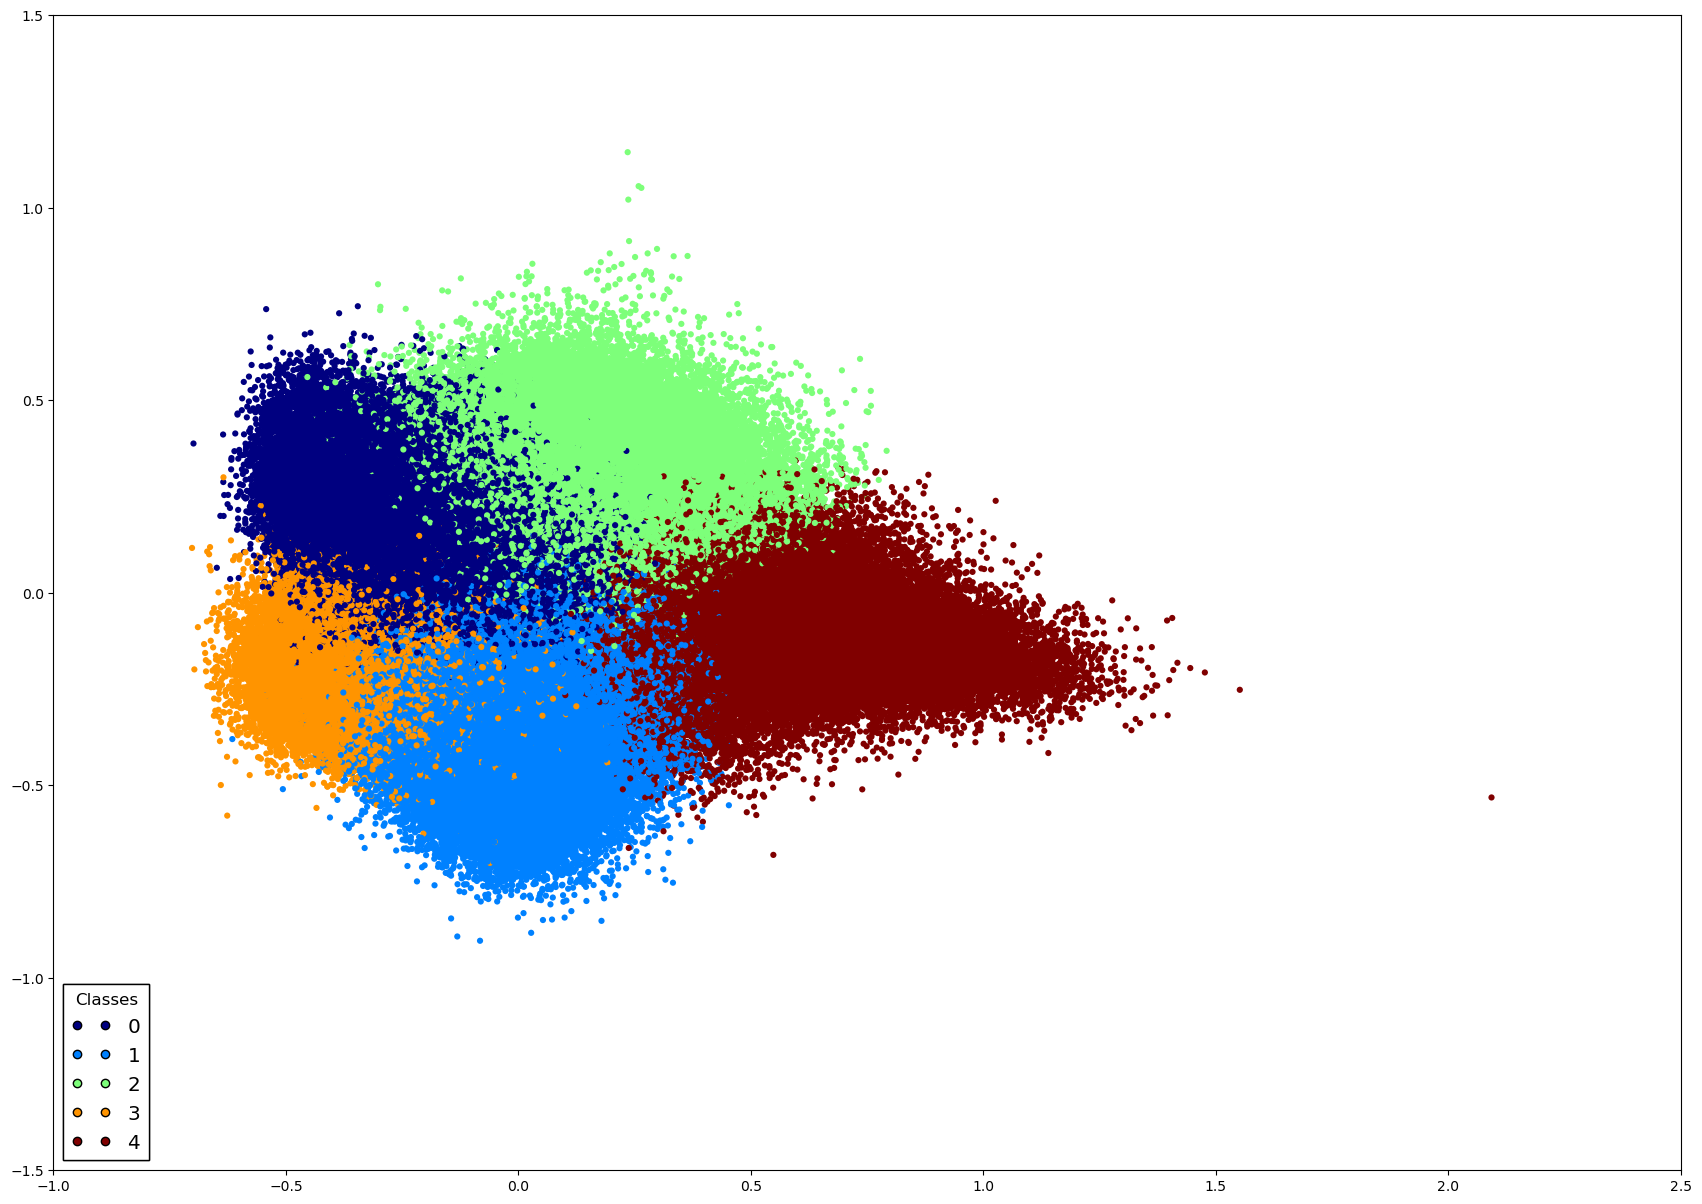

In [6]:
c = Clusterer.Clusterer(documents_vectors, 5)
c.getTopics(dataset, keys=dataset_keys)
c.plot(size=(21, 15))

# LoTTE

In [ ]:
dataset = FileManager.csv_to_dict("/RRM2L.csv")
dataset_keys = list(dataset.keys())

In [ ]:
vectorizer, dataset_keys, tfidf_matrix, corpus_matrix = FileManager.load_model_from_drive("python/model/lotte")

In [ ]:
c = Clusterer.Clusterer(corpus_matrix,6)
c.getTopics(dataset,keys=dataset_keys)
c.plot(size=(21, 15))